

Use the US census data for example: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html

Open the XLS link for "Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019 (NST-EST2019-01)". SWitch the cell type of the Census column to "General" to remove the thousands-delimiter. Then highlight the cells for the 50 states and press ctrl-C (command-C) to copy the cells.

then in R, recall with
Windows: read.DIF("clipboard", transpose=TRUE)
Mac: read.table(pipe('pbpaste'))


In [22]:
#Winodw
#USstatePops <- read.DIF("clipboard", transpose=TRUE)
#Mac
#USstatePops <- read.table(pipe('pbpaste'))

In [23]:
# read excel directly (use suppressMessages() to suppress the "New names: messages")
library("readxl")
suppressMessages(my_data <- read_excel("data/nst-est2019-01.xlsx", skip=3))

# extract the subset we need
state_pops <- data.frame(my_data[c(6:56), c(1:2)])
names(state_pops) <- c("State", "Pop2010")
state_pops$State = substr(state_pops$State, start = 2, stop = 99)

# convert census column to integers
state_pops$Pop2010 <- as.integer(state_pops$Pop2010)

state_pops
summary(state_pops)

State,Pop2010
<chr>,<int>
Alabama,4779736
Alaska,710231
Arizona,6392017
Arkansas,2915918
California,37253956
Colorado,5029196
Connecticut,3574097
Delaware,897934
District of Columbia,601723


    State              Pop2010        
 Length:51          Min.   :  563626  
 Class :character   1st Qu.: 1696962  
 Mode  :character   Median : 4339367  
                    Mean   : 6053834  
                    3rd Qu.: 6636084  
                    Max.   :37253956  

In [24]:
print(range(state_pops$Pop2010))
print(mean(state_pops$Pop2010), digits=2)
print(median(state_pops$Pop2010))
print(mode(state_pops$Pop2010))
print(var(state_pops$Pop2010), digits=7)
print(sd(state_pops$Pop2010))

[1]   563626 37253956
[1] 6053834
[1] 4339367
[1] "numeric"
[1] 4.656676e+13
[1] 6823984


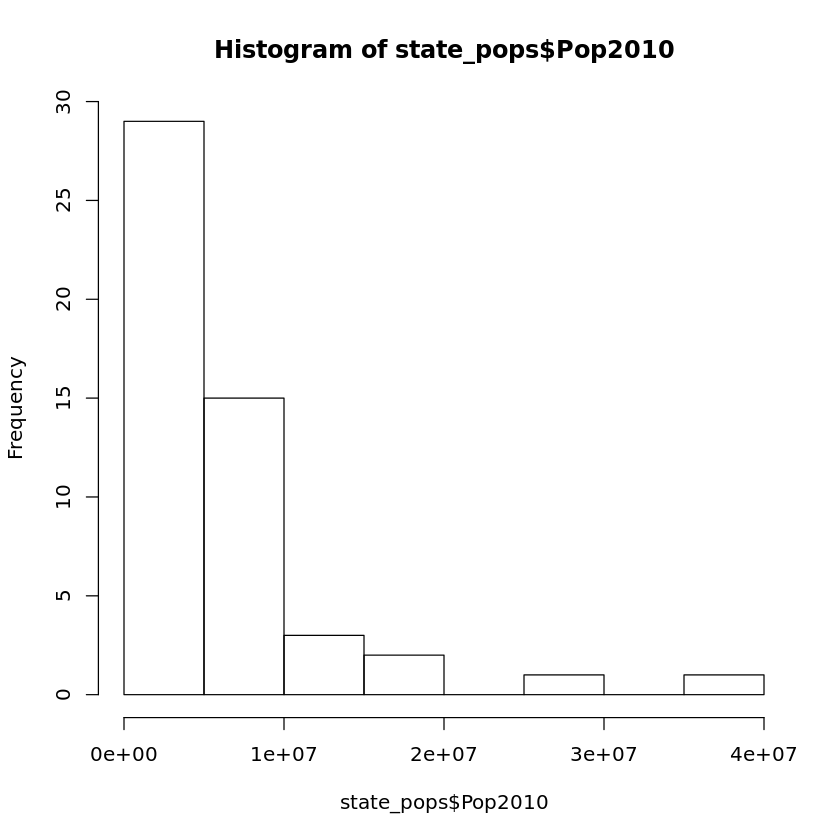

In [25]:
hist(state_pops$Pop2010)

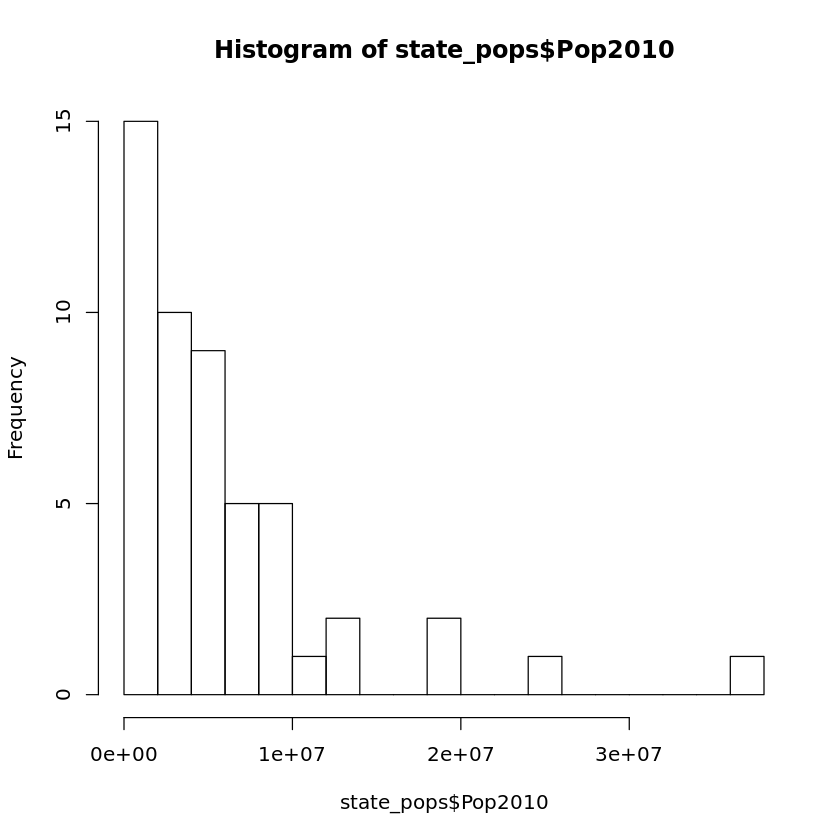

In [26]:
hist(state_pops$Pop2010, breaks=20)

The normal distribution is used extensively through applied statistics
as a tool for making comparisons. We can use rnorm() function to generate a random number data set that fits a normal distribution

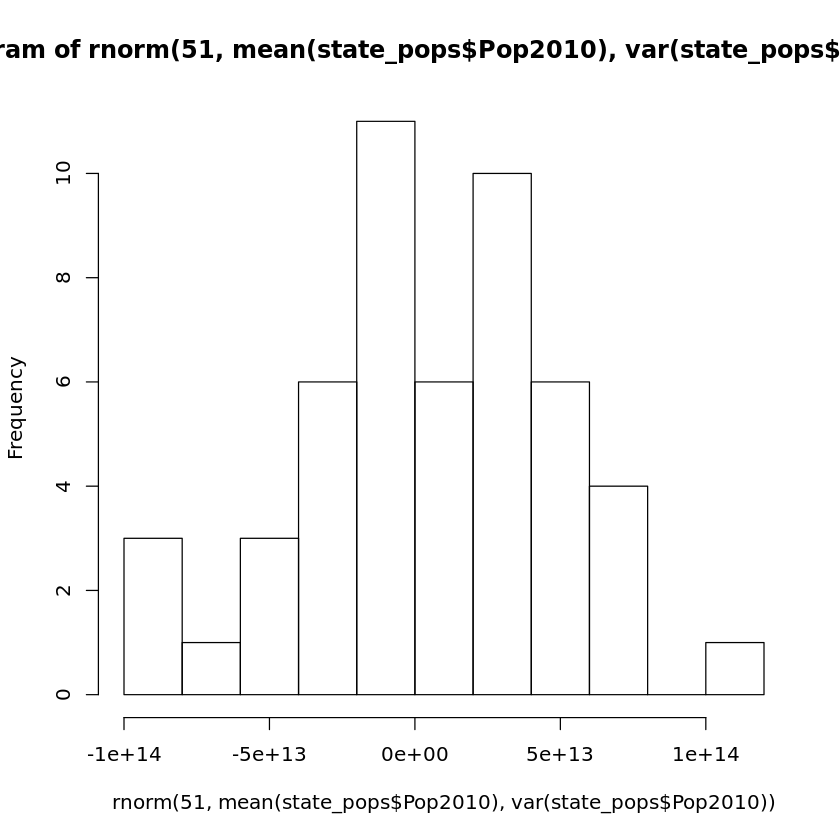

In [27]:
hist(rnorm(51, mean(state_pops$Pop2010), var(state_pops$Pop2010)))

## Saving a Data Frame

Data Frames can be saved for later use

In [28]:
save(state_pops, file="data/state_pops.rda")
rm(state_pops)